<a href="https://colab.research.google.com/github/resthiana12/Kelainan_Psikologis_CNN/blob/main/2_Klasifikasi_Teks_Kelainan_Psikologis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Install Package yang Dibutuhkan**

In [ ]:
pip install emot

     |████████████████████████████████| 61 kB 22 kB/s 


In [ ]:
pip install emoji

     |████████████████████████████████| 184 kB 28.4 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=1529c5bc5377bc3593a65a254ea919d088907952e355bdd1d650eb50134dfaf0
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [ ]:
pip install sastrawi

     |████████████████████████████████| 209 kB 33.3 MB/s 


In [ ]:
pip install swifter

     |████████████████████████████████| 296 kB 38.9 MB/s 
     |████████████████████████████████| 118 kB 75.0 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


**#Load Library**

In [ ]:
#load library
import nltk                             
import matplotlib.pyplot as plt           
import random  
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
import numpy as np
import pandas as pd
import re                                  
import string                             
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
from nltk import pos_tag, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import words
import emoji
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
from wordcloud import WordCloud 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


**Preprocessing**

In [ ]:
stop = pd.read_csv("drive/MyDrive/stopwords.txt", names= ["stopwords"], header = None)
stop['stopwords']
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('indonesian'))
# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
user_stopwords = ['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'na',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'ber',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 's','lhaa',
                       'qrt', 'd', 'ayyy', 'eptember', 'tu', 'kat', 'd',
                        'bdhshshhs', 'denngan','ba', 'ah', 'tuu', 'kaann', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 'je',
                       '&amp', 'yah', 'x', 'xf', 'xe', 'first', 'second',
                        'the', 'to', 'yaa', 'dirut', 'la', 'pon']
alphabets = list(string.ascii_lowercase)
stop_words_fix = stop_words + alphabets + stop['stopwords'].to_list()

# Function to remove punctuations, links, emojis, and stop words
def preprocessTweets(tweet):
    tweet = tweet.lower()  #has to be in place
    #Remove 'b
    tweet = re.sub(r"b'", '', tweet)
    # Remove urls dan trash
    tweet = re.sub(r"http\S+|\\x\S+|www\S+|https\S+|dot|com", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words_fix]
    filtered_words = [w for w in tweet_tokens if w not in user_stopwords]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them

def tokenkan(text):    
  tokens = nltk.tokenize.word_tokenize(text)
  return tokens

normalizad_word = pd.read_excel("drive/MyDrive/normalisasi.xlsx")
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

def stopwords_removal(words):
    return [word for word in words if word not in stop_words]

In [ ]:
data = pd.read_csv('drive/MyDrive/data_psyco/Copy_of_Text_Preprocessing_10.csv')
data.columns = ['Label', 'Text_Final']
data.head()

,Label,Text_Final
0,0,hubby bidang it upload bobol cloud ransom hack...
1,0,pas uang beli pas uang beli
2,0,tolong lelang acc foll k tweet k foll k twee k...
3,0,rakyat gaji uang uang game monopoli meureu
4,0,ketemu sebentar kangen uang gaji


In [ ]:
data.Label.unique()

array([0, 1])

In [ ]:
mengidap = []
non = []
for l in data.Label:
    if l == 0:
        mengidap.append(0)
        non.append(1)
    elif l == 1:
        mengidap.append(1)
        non.append(0)

In [ ]:
data['non']= non
data['mengidap']= mengidap

In [ ]:
data['tokens'] = data['Text_Final'].astype(str)
data['tokens'] = data['tokens'].apply(tokenkan)

In [ ]:
data = data[['Text_Final', 'tokens', 'Label', 'non', 'mengidap']]

In [ ]:
data.head()

,Text_Final,tokens,Label,non,mengidap
0,hubby bidang it upload bobol cloud ransom hack...,"[hubby, bidang, it, upload, bobol, cloud, rans...",0,1,0
1,pas uang beli pas uang beli,"[pas, uang, beli, pas, uang, beli]",0,1,0
2,tolong lelang acc foll k tweet k foll k twee k...,"[tolong, lelang, acc, foll, k, tweet, k, foll,...",0,1,0
3,rakyat gaji uang uang game monopoli meureu,"[rakyat, gaji, uang, uang, game, monopoli, meu...",0,1,0
4,ketemu sebentar kangen uang gaji,"[ketemu, sebentar, kangen, uang, gaji]",0,1,0


**Import Library Untuk CNN**

In [ ]:
from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
import os
import collections
import string
import tensorflow as tf
import keras

**Split data into test and train**

In [ ]:
data_train, data_test = train_test_split(data, test_size=0.20, random_state=42)

In [ ]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

2797 words total, with a vocabulary size of 1320
Max sentence length is 41


In [ ]:
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

656 words total, with a vocabulary size of 452
Max sentence length is 28


**Load Google News Word2Vec model**

In [ ]:
word2vec_path = 'drive/MyDrive/GoogleNews-vectors-negative300.bin.gz'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

**Get Embeddings**

In [ ]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [ ]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

**Tokenize and Pad sequences**

In [ ]:
text = data_train["Text_Final"].astype(str)
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(text.tolist())
training_sequences = tokenizer.texts_to_sequences(text.tolist())
print(training_sequences)
train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

[[1, 406, 407, 408, 409, 22, 410, 53, 411, 412, 413, 414, 415], [416, 1], [70, 3, 1, 70], [89, 417, 418, 131, 419, 90], [132, 133, 420, 14, 2, 1, 421, 422, 9, 423], [40, 424, 425, 426], [206, 427, 428, 27, 91, 9, 1], [41, 1, 429, 207, 92], [208, 208, 7, 430, 54, 134], [1, 431, 432], [71, 135, 17, 209, 433, 210, 434, 435, 436, 437, 438], [2, 1, 90, 5, 93, 94, 439, 6], [440, 2, 1], [441, 211, 55, 95], [3, 28, 1, 72, 442, 5, 443, 444, 445, 27], [446, 4, 53, 22, 1], [72, 5, 5, 42, 42], [43, 1, 15], [44, 5, 18, 29, 56, 16, 212], [213, 447, 30, 57, 214, 213, 448, 30, 96, 449, 136, 450, 1, 451, 137], [73, 138, 452, 31, 73, 31, 138, 453, 31, 73, 31, 215, 31, 73, 31, 1, 31], [19, 216, 19, 217, 1, 454, 455, 456, 457, 458, 97], [139, 459, 460, 8, 461, 462, 10, 463], [464, 98, 1, 465], [466, 140, 99, 1, 1, 467], [23, 23, 1, 218], [100, 468], [58, 54, 219, 101, 141, 102, 23, 469, 470, 4], [142, 1, 143, 142, 1, 24], [471, 59, 45, 1, 103], [472, 473, 220, 20, 1], [474, 221, 221, 93, 1, 144, 7, 60], [

In [ ]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)
# Embed a 1,321 word vocabulary into 300 dimensions.

(1321, 300)


In [ ]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

**Define CNN**

In [ ]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):

    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4,5,6]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='nadam',
                  metrics=['acc'])
    return model

In [ ]:
label_names = ['mengidap', 'non']

In [ ]:
print(len(list(label_names)))

2


In [ ]:
y_train = data_train[label_names].values

In [ ]:
x_train = train_cnn_data
y_tr = y_train

In [ ]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

**Train CNN**

In [ ]:
data_train['Label'].value_counts()

0    272
1    172
Name: Label, dtype: int64

In [ ]:
num_epochs = 400
batch_size = 111

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "drive/MyDrive/data_psyco/4_klasifikasi_training_mentall_fix/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
# Create a new model instance
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=4*batch_size)
# Save the weights using the `checkpoint_path` format
#model.save_weights(checkpoint_path.format(epoch=0))

In [ ]:
os.listdir(checkpoint_dir)

['cp-0000.ckpt.index',
 'cp-0000.ckpt.data-00000-of-00001',
 'cp-0111.ckpt.data-00000-of-00001',
 'cp-0111.ckpt.index',
 'cp-0222.ckpt.data-00000-of-00001',
 'cp-0222.ckpt.index',
 'cp-0333.ckpt.data-00000-of-00001',
 'cp-0333.ckpt.index',
 'checkpoint']

In [ ]:
#model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size, callbacks=cp_callback)
# Display the model's architecture
#model.summary()

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'drive/MyDrive/data_psyco/4_klasifikasi_training_mentall_fix/cp-0333.ckpt'

In [ ]:
new_model = ConvNet((train_embedding_weights), MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))
# Load the previously saved weights
new_model.load_weights(latest)

# Re-evaluate the model
loss, acc = new_model.evaluate(x_train, y_tr, verbose=1)

14/14 [==============================] - 2s 62ms/step - loss: 0.2146 - acc: 0.9640


**Test CNN**

In [ ]:
predictions = new_model.predict(test_cnn_data, batch_size=4, verbose=1)

28/28 [==============================] - 0s 11ms/step


In [ ]:
y_pred=np.argmax(predictions,axis=1)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1])

In [ ]:
labels = [1, 0]

In [ ]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [ ]:
hasil = sum(data_test.Label==prediction_labels)/len(prediction_labels)
print('Accuracy : %s' % hasil)

Accuracy : 0.6396396396396397


In [ ]:
data_test.Label.value_counts()

0    62
1    49
Name: Label, dtype: int64

**Scoring**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(33.0, 0.5, 'y_pred')

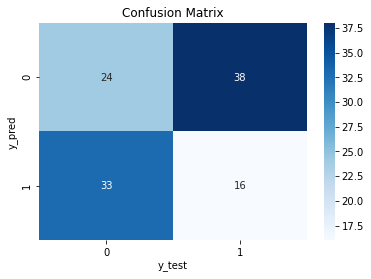

In [ ]:
cm=confusion_matrix(data_test.Label,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt='')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [ ]:
print(classification_report(data_test.Label,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.39      0.40        62
           1       0.30      0.33      0.31        49

    accuracy                           0.36       111
   macro avg       0.36      0.36      0.36       111
weighted avg       0.37      0.36      0.36       111



**Klasifikasi Teks Ujicoba**

In [ ]:
def text_preprocessing(text):
  df['preprocess_awal'] = text.apply(preprocessTweets)
  df['tokenkan'] = df['preprocess_awal'].apply(tokenkan)
  df['normalized'] = df['tokenkan'].apply(normalized_term)
  df['normalized'] = df['normalized'].apply(stopwords_removal)

  # create stemmer
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  # stemmed
  def stemmed_wrapper(term):
      return stemmer.stem(term)

  term_dict = {}

  for document in df['normalized']:
      for term in document:
          if term not in term_dict:
              term_dict[term] = ' '
              
  #print(len(term_dict))
  print("------------------------")

  for term in term_dict:
      term_dict[term] = stemmed_wrapper(term)
      print(term,":" ,term_dict[term])
      
  #print(term_dict)
  print("------------------------")


  # apply stemmed term to dataframe
  def get_stemmed_term(document):
      return [term_dict[term] for term in document]

  df['stemmed'] = df['normalized'].swifter.apply(get_stemmed_term)
  #print(df['stemmed'])

  def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

  df['stemmed'] = df['stemmed'].astype(str)
  df['stemmed'] = df['stemmed'].apply(remove_punct)

In [ ]:
X = 'Terkadang, kamu perlu mengistirahatkan pikiran mu saat merasa sulit menghadapi hidup ini. Kamu bukan budak dunia ini. Dunia akan datang dan pergi. Tapi hubungan ku dengan pencipta ku tidak akan pergi'
datax = {'Postingan':[X]}
df = pd.DataFrame(datax)
df.head()

,Postingan
0,"Terkadang, kamu perlu mengistirahatkan pikiran..."


In [ ]:
text_preprocessing(df['Postingan'])
df.head()

------------------------
terkadang : terkadang
mengistirahatkan : istirahat
pikiran : pikir
mu : mu
sulit : sulit
menghadapi : hadap
hidup : hidup
budak : budak
dunia : dunia
pergi : pergi
hubungan : hubung
ku : ku
pencipta : cipta
------------------------


Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

,Postingan,preprocess_awal,tokenkan,normalized,stemmed
0,"Terkadang, kamu perlu mengistirahatkan pikiran...",terkadang kamu perlu mengistirahatkan pikiran ...,"[terkadang, kamu, perlu, mengistirahatkan, pik...","[terkadang, mengistirahatkan, pikiran, mu, sul...",terkadang istirahat pikir mu sulit hadap hidup...


In [ ]:
X_sample = tokenizer.texts_to_sequences(df['stemmed'])
print(X_sample)
X_sample = pad_sequences(X_sample, maxlen=MAX_SEQUENCE_LENGTH)

y_sample = new_model.predict(X_sample).flatten().tolist()
hasil = labels[np.argmax(y_sample)]
print(hasil)
if hasil == 0 :
  print('tidak mengidap gangguan psikologis')
else:
  print('mengidap gangguan psikologis')

[[1278, 218, 169, 31, 214, 5, 22, 22, 77, 350, 8, 8, 77]]
0
tidak mengidap gangguan psikologis


In [ ]:
df = pd.read_excel('drive/MyDrive/data_psyco/Copy_of_test_data_20.xlsx').astype(str)

In [ ]:
text_preprocessing(df['Postingan_Original'])
df.head()

------------------------
bunuh : bunuh
pulang : pulang
prokes : prokes
deh : deh
mati : mati
sakit : sakit
urus : urus
tetaplah : tetap
haha : haha
hihi : hihi
bawaannya : bawa
menghilang : hilang
dunia : dunia
ngeri : ngeri
hidup : hidup
hidupnya : hidup
memuliakan : mulia
tuhan : tuhan
salut : salut
banget : banget
ih : ih
iya : iya
angkat : angkat
langsung : langsung
perlahan-lahan : perlahan-lahan
... : 
satu-satunya : satu
ku : ku
pria : pria
tertidur : tidur
pelukanku : peluk
john : john
alasan : alas
meledakkan : ledak
kepalaku : kepala
pemuda : pemuda
gagal : gagal
kwkwk : kwkwk
bsa : bsa
ngerasa : ngerasa
covid : covid
kah : kah
klaim : klaim
\n\natheis : n natheis
akalnya : akal
ilmunya : ilmu
uangnya : uang
listrik : listrik
pengen : ken
cuman : cuman
beban : beban
cape : cape
dirumah : rumah
asli : asli
abis : abis
lebaran : lebaran
sumpah : sumpah
cabut : cabut
allah : allah
nyawaku : nyawa
gapapa : gapapa
nangis : nang
stres : stres
depresi : depresi
da : da
arah : arah
w

Pandas Apply:   0%|          | 0/20 [00:00<?, ?it/s]

,Label,Postingan_Original,Postingan_Preprocessed,preprocess_awal,tokenkan,normalized,stemmed
0,1,"Dah lah bunuh aja gue, pulang2 ga prokes lagi ...",bunuh pulang prokes deh mati sakit urus,dah lah bunuh gue pulang prokes lagi deh gue m...,"[dah, lah, bunuh, gue, pulang, prokes, lagi, d...","[bunuh, pulang, prokes, deh, mati, sakit, urus]",bunuh pulang prokes deh mati sakit urus
1,1,tetaplah haha hihi bawaannya bunuh menghilang ...,haha hihi bunuh,tetaplah haha hihi bawaannya bunuh menghilang ...,"[tetaplah, haha, hihi, bawaannya, bunuh, mengh...","[tetaplah, haha, hihi, bawaannya, bunuh, mengh...",tetap haha hihi bawa bunuh hilang dunia mati
2,0,"Ngeri ya. Selama hidup, hidupnya memuliakan Tu...",ngeri hidup hidup mulia tuhan mati mulia tuhan...,ngeri selama hidup hidupnya memuliakan tuhan m...,"[ngeri, selama, hidup, hidupnya, memuliakan, t...","[ngeri, hidup, hidupnya, memuliakan, tuhan, ma...",ngeri hidup hidup mulia tuhan mati mulia tuhan...
3,0,"@xxrevaille ih iya gue juga sering,waktu itu p...",ih iya angkat langsung mati,ih iya gue juga sering waktu itu pernah gue an...,"[ih, iya, gue, juga, sering, waktu, itu, perna...","[ih, iya, angkat, langsung, mati]",ih iya angkat langsung mati
4,1,Aku perlahan-lahan mati di dalam ... Aku meras...,perlahan mati ku hidup pria tidur peluk john a...,aku perlahan-lahan mati di dalam ... aku meras...,"[aku, perlahan-lahan, mati, di, dalam, ..., ak...","[perlahan-lahan, mati, ..., satu-satunya, ku, ...",perlahanlahan mati satu ku hidup pria tidur p...


In [ ]:
test_sequences_1 = tokenizer.texts_to_sequences(df["Postingan_Preprocessed"].tolist())
test_cnn_data_1 = pad_sequences(test_sequences_1, maxlen=MAX_SEQUENCE_LENGTH)
#print(test_cnn_data_1)

In [ ]:
def dicoba(text):
  return new_model.predict(test_cnn_data_1)

def dicoba_2(text):
  i = 0
  for y in text:
    hasil = labels[np.argmax(y)]
    #print(hasil)
    if hasil == 0:
      df.loc[i, 'Predicted'] = 'tidak mengidap gangguan psikologis'
      i = i+1
    else:
      df.loc[i, 'Predicted'] = 'mengidap gangguan psikologis'
      i = i+1

In [ ]:
hasil_1 = dicoba(test_cnn_data_1)
#print(hasil_1)
dicoba_2(hasil_1)

In [ ]:
df.head(20)

,Label,Postingan_Original,Postingan_Preprocessed,preprocess_awal,tokenkan,normalized,stemmed,Predicted
0,1,"Dah lah bunuh aja gue, pulang2 ga prokes lagi ...",bunuh pulang prokes deh mati sakit urus,dah lah bunuh gue pulang prokes lagi deh gue m...,"[dah, lah, bunuh, gue, pulang, prokes, lagi, d...","[bunuh, pulang, prokes, deh, mati, sakit, urus]",bunuh pulang prokes deh mati sakit urus,mengidap gangguan psikologis
1,1,tetaplah haha hihi bawaannya bunuh menghilang ...,haha hihi bunuh,tetaplah haha hihi bawaannya bunuh menghilang ...,"[tetaplah, haha, hihi, bawaannya, bunuh, mengh...","[tetaplah, haha, hihi, bawaannya, bunuh, mengh...",tetap haha hihi bawa bunuh hilang dunia mati,mengidap gangguan psikologis
2,0,"Ngeri ya. Selama hidup, hidupnya memuliakan Tu...",ngeri hidup hidup mulia tuhan mati mulia tuhan...,ngeri selama hidup hidupnya memuliakan tuhan m...,"[ngeri, selama, hidup, hidupnya, memuliakan, t...","[ngeri, hidup, hidupnya, memuliakan, tuhan, ma...",ngeri hidup hidup mulia tuhan mati mulia tuhan...,mengidap gangguan psikologis
3,0,"@xxrevaille ih iya gue juga sering,waktu itu p...",ih iya angkat langsung mati,ih iya gue juga sering waktu itu pernah gue an...,"[ih, iya, gue, juga, sering, waktu, itu, perna...","[ih, iya, angkat, langsung, mati]",ih iya angkat langsung mati,tidak mengidap gangguan psikologis
4,1,Aku perlahan-lahan mati di dalam ... Aku meras...,perlahan mati ku hidup pria tidur peluk john a...,aku perlahan-lahan mati di dalam ... aku meras...,"[aku, perlahan-lahan, mati, di, dalam, ..., ak...","[perlahan-lahan, mati, ..., satu-satunya, ku, ...",perlahanlahan mati satu ku hidup pria tidur p...,tidak mengidap gangguan psikologis
5,0,@animefess_ Tentang seorang pemuda yg ingin bu...,pemuda bunuh gagal kwkwk,tentang seorang pemuda ingin bunuh diri tapi s...,"[tentang, seorang, pemuda, ingin, bunuh, diri,...","[pemuda, bunuh, gagal, kwkwk]",pemuda bunuh gagal kwkwk,mengidap gangguan psikologis
6,1,Ingin Rasanya Bunuh Diri,bunuh,ingin rasanya bunuh diri,"[ingin, rasanya, bunuh, diri]",[bunuh],bunuh,mengidap gangguan psikologis
7,0,udah mati rasa ni ga bsa ngerasa apa2 covid kah?',mati ni bsa ngerasa covid kah,udah mati rasa ni bsa ngerasa apa covid kah,"[udah, mati, rasa, ni, bsa, ngerasa, apa, covi...","[mati, bsa, ngerasa, covid, kah]",mati bsa ngerasa covid kah,mengidap gangguan psikologis
8,0,@Anggi_sapiens Dia ini dulu klaim dirinya seba...,klaim tuhan mati atheis klaim akal ilmu uang,dia ini dulu klaim dirinya sebagai tuhan ... a...,"[dia, ini, dulu, klaim, dirinya, sebagai, tuha...","[klaim, tuhan, ..., mati, ..., \n\natheis, kla...",klaim tuhan mati n natheis klaim akal ilmu uang,tidak mengidap gangguan psikologis
9,0,Hari hari mati listrik',mati listrik,hari hari mati listrik,"[hari, hari, mati, listrik]","[mati, listrik]",mati listrik,tidak mengidap gangguan psikologis
